# ML for State Energy Comparison - Linear Regression

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
# read the data
df = pd.read_csv("db/states_comparison.csv", index_col=0)
df.head()

,State,Year,Prod Data,Cons Data,Difference
0,Alaska,1960,6800.0,61433.0,-54633.0
1,Alabama,1960,112809.0,866594.0,-753785.0
2,Arkansas,1960,48104.0,425974.0,-377870.0
3,Arizona,1960,36181.0,282993.0,-246812.0
4,California,1960,270161.0,3449919.0,-3179758.0


In [3]:
# select a state 
df = df.loc[df["State"] == "Texas"]
df.head()

,State,Year,Prod Data,Cons Data,Difference
43,Texas,1960,50155.0,4416216.0,-4366061.0
94,Texas,1961,52023.0,4447880.0,-4395857.0
145,Texas,1962,47721.0,4640675.0,-4592954.0
196,Texas,1963,42718.0,4894089.0,-4851371.0
247,Texas,1964,43884.0,5012683.0,-4968799.0


In [4]:
# see the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 43 to 2950
Data columns (total 5 columns):
State         58 non-null object
Year          58 non-null int64
Prod Data     58 non-null float64
Cons Data     58 non-null float64
Difference    58 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ KB


In [5]:
# select X and y values
X = df["Year"].values.reshape(-1,1)
y = df["Difference"].values.reshape(-1,1)

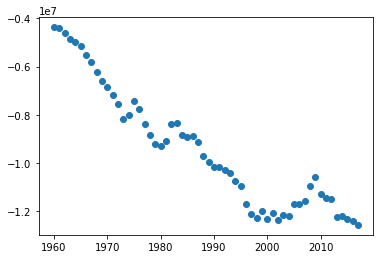

In [6]:
# see if data is linear
plt.scatter(X,y)

In [7]:
# split the data to train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# calculate the scores

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8883901991658605
Testing Score: 0.8912528211358373


In [10]:
# Use our model to make predictions
from sklearn.metrics import mean_squared_error, r2_score


predicted = model.predict(X_test)

In [11]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 820360723989.2278
R-squared (R2 ): 0.8912528211358371


In [12]:
predictions = model.predict(X_test[:5])
print(f"Predicted classes: {predictions}")

Predicted classes: [[ -5566882.44532666]
 [ -6247617.46856317]
 [-10195880.6033349 ]
 [ -7336793.5057416 ]
 [-11557350.64980793]]


In [13]:
n = model.predict([[2030]])
n

array([[-15097172.77063775]])

In [19]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [20]:
# read the data
df = pd.read_csv("db/states_comparison.csv", index_col=0)
df.head()

,State,Year,Prod Data,Cons Data,Difference
0,Alaska,1960,6800.0,61433.0,-54633.0
1,Alabama,1960,112809.0,866594.0,-753785.0
2,Arkansas,1960,48104.0,425974.0,-377870.0
3,Arizona,1960,36181.0,282993.0,-246812.0
4,California,1960,270161.0,3449919.0,-3179758.0


In [21]:
# Select the states
states = df["State"].unique()
states

# create the for loop
for state in states:
    # Select the States
    df = df.loc[df["State"] == state]
    
    # select X and y values & reshape them
    X = df["Year"].values.reshape(-1,1)
    y = df["Difference"].values.reshape(-1,1)
    
    # Split the Data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Create and fit the models 
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # calculate the scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    print(f"{state} Training Score: {training_score}")
    print(f"{state} Testing Score: {testing_score}")
    print("-----------------------------------------")
    
    # read the dataframe again
    df = pd.read_csv("db/states_comparison.csv", index_col=0)



Alaska Training Score: 0.7931053479308682
Alaska Testing Score: 0.8793687845639334
-----------------------------------------
Alabama Training Score: 0.7377095809195997
Alabama Testing Score: 0.8346672464097704
-----------------------------------------
Arkansas Training Score: 0.7987333869577279
Arkansas Testing Score: 0.8752923494630709
-----------------------------------------
Arizona Training Score: 0.9566093837550472
Arizona Testing Score: 0.9648775657794604
-----------------------------------------
California Training Score: 0.778583425080572
California Testing Score: 0.8464402738891006
-----------------------------------------
Colorado Training Score: 0.9406514542956643
Colorado Testing Score: 0.9595473062493561
-----------------------------------------
Connecticut Training Score: 0.451736583386002
Connecticut Testing Score: 0.5849304955824337
-----------------------------------------
District of Columbia Training Score: 0.24432839414781404
District of Columbia Testing Score: 0.32

# Total Energy consumption predictions


In [17]:
# read the data
df1 = pd.read_csv("db/states_comparison.csv", index_col=0)
df1.head()

,State,Year,Prod Data,Cons Data,Difference
0,Alaska,1960,6800.0,61433.0,-54633.0
1,Alabama,1960,112809.0,866594.0,-753785.0
2,Arkansas,1960,48104.0,425974.0,-377870.0
3,Arizona,1960,36181.0,282993.0,-246812.0
4,California,1960,270161.0,3449919.0,-3179758.0


In [18]:
# Select the states
states = df1["State"].unique()
states

# create the for loop
for state in states:
    # Select the States
    df1 = df1.loc[df["State"] == state]
    
    # select X and y values & reshape them
    X1 = df1["Year"].values.reshape(-1,1)
    y1 = df1["Cons Data"].values.reshape(-1,1)
    
    # Split the Data into training and test sets
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
    
    # Create and fit the models 
    model = LinearRegression()
    model.fit(X1_train, y1_train)
    
    # calculate the scores
    training_score = model.score(X1_train, y1_train)
    testing_score = model.score(X1_test, y1_test)
    print(f"{state} Training Score: {training_score}")
    print(f"{state} Testing Score: {testing_score}")
    print("-----------------------------------------")
    
    # read the dataframe again
    df1 = pd.read_csv("db/states_comparison.csv", index_col=0)


Alaska Training Score: 0.8000592676678502
Alaska Testing Score: 0.8793833103169683
-----------------------------------------
Alabama Training Score: 0.7783502332833752
Alabama Testing Score: 0.8345690057577884
-----------------------------------------
Arkansas Training Score: 0.8327613986610594
Arkansas Testing Score: 0.8917155940207444
-----------------------------------------
Arizona Training Score: 0.9734616487997267
Arizona Testing Score: 0.9762913362949323
-----------------------------------------
California Training Score: 0.817926392403552
California Testing Score: 0.8569566987940436
-----------------------------------------
Colorado Training Score: 0.9633438400404386
Colorado Testing Score: 0.9688033108279385
-----------------------------------------
Connecticut Training Score: 0.4711610560985484
Connecticut Testing Score: 0.5924983492429071
-----------------------------------------
District of Columbia Training Score: 0.2500448159388573
District of Columbia Testing Score: 0.32